In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
sns.set_style('white')
df = pd.read_csv('ESSdata_Thinkful.csv')


In [3]:
df_czch = df.loc[((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6), ['cntry', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet']]
df_jittered = df_czch.loc[:, 'tvtot':'sclmeet'].dropna()
jitter = pd.DataFrame(np.random.uniform(-.3, .3, size=df_jittered.shape), columns=df_jittered.columns)
#print(df_jittered)
df_jittered = df_jittered.add(jitter)

C:\Users\Po\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


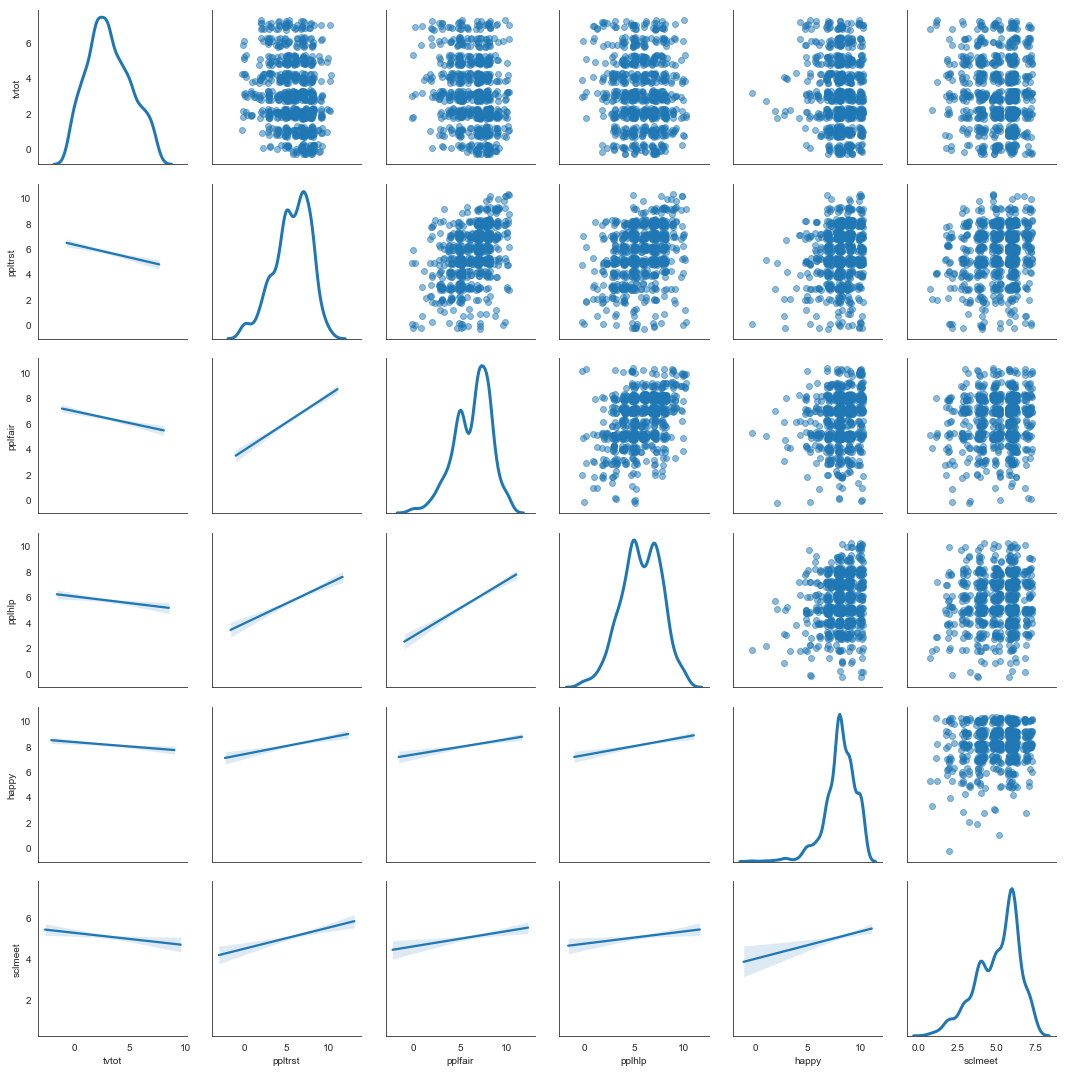

In [4]:
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

In [5]:
corrmat = df_czch.corr()
print(corrmat)

            tvtot   ppltrst   pplfair    pplhlp     happy   sclmeet
tvtot    1.000000 -0.240432 -0.233280 -0.176517 -0.265293 -0.144105
ppltrst -0.240432  1.000000  0.605589  0.500378  0.297432  0.148949
pplfair -0.233280  0.605589  1.000000  0.532927  0.275204  0.105886
pplhlp  -0.176517  0.500378  0.532927  1.000000  0.269627  0.109383
happy   -0.265293  0.297432  0.275204  0.269627  1.000000  0.244289
sclmeet -0.144105  0.148949  0.105886  0.109383  0.244289  1.000000


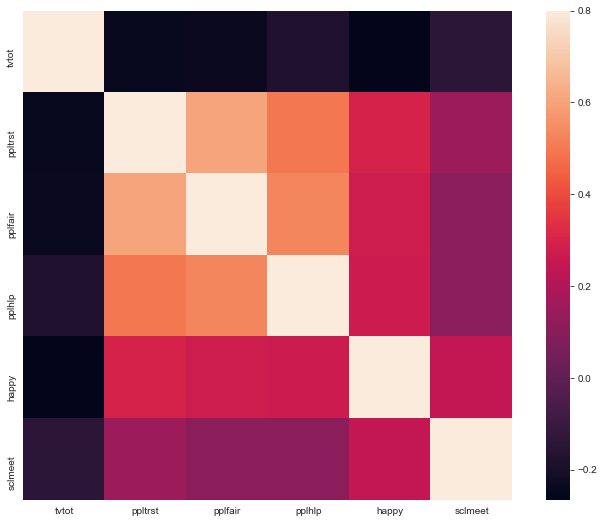

In [6]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

C:\Users\Po\AppData\Local\conda\conda\envs\DataScience\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Po\AppData\Local\conda\conda\envs\DataScience\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


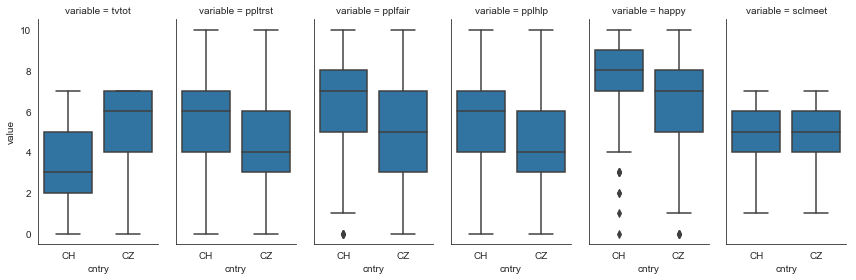

                cntry
happy    count  CH       770.000000
                CZ       646.000000
         mean   CH         8.088312
                CZ         6.770898
         std    CH         1.437920
                CZ         2.053582
         min    CH         0.000000
                CZ         0.000000
         25%    CH         7.000000
                CZ         5.000000
         50%    CH         8.000000
                CZ         7.000000
         75%    CH         9.000000
                CZ         8.000000
         max    CH        10.000000
                CZ        10.000000
pplfair  count  CH       770.000000
                CZ       649.000000
         mean   CH         6.350649
                CZ         4.959938
         std    CH         1.964352
                CZ         2.244664
         min    CH         0.000000
                CZ         0.000000
         25%    CH         5.000000
                CZ         3.000000
         50%    CH         7.000000
      

In [19]:
df_long = df_czch
df_long = pd.melt(df_long, id_vars=['cntry'])

g = sns.FacetGrid(df_long, col='variable', size=4, aspect=.5)
g = g.map(sns.boxplot, 'cntry', 'value')
plt.show()

print(df_czch.groupby('cntry').describe().unstack())

for col in df_czch.loc[:, 'tvtot':'sclmeet'].columns:
    print(col)
    print(stats.ttest_ind(
        df_czch[df_czch['cntry'] == 'CZ'][col].dropna(),
        df_czch[df_czch['cntry'] == 'CH'][col].dropna()
    ))

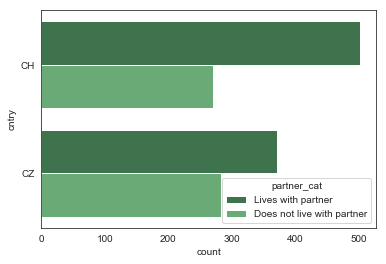

partner_cat  Does not live with partner  Lives with partner
cntry                                                      
CH                                  270                 503
CZ                                  284                 372
Power_divergenceResult(statistic=96.39958012596222, pvalue=9.236593586645439e-21)


In [18]:
df_2cat = df.loc[((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6), ['cntry', 'partner']]
df_2cat['partner_cat'] = None
df_2cat.loc[df['partner'] == 1, 'partner_cat'] = 'Lives with partner'
df_2cat.loc[df['partner'] == 2, 'partner_cat'] = 'Does not live with partner'

sns.countplot(y='cntry', hue='partner_cat', data=df_2cat, palette='Greens_d')
plt.show()

counttable = pd.crosstab(df_2cat['cntry'], df_2cat['partner_cat'])
print(counttable)

print(stats.chisquare(counttable, axis=None))